In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
customer = pd.read_csv(r"E:\Assignments\Python Foundation Case Study 1 - Retail Case Study\Customer.csv")
products = pd.read_csv(r"E:\Assignments\Python Foundation Case Study 1 - Retail Case Study\prod_cat_info.csv")
Transaction = pd.read_csv(r"E:\Assignments\Python Foundation Case Study 1 - Retail Case Study\Transactions.csv")

In [3]:
customer

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0
...,...,...,...,...
5642,274474,19-12-1992,M,2.0
5643,267666,24-12-1992,M,6.0
5644,270476,25-12-1992,F,3.0
5645,269626,27-12-1992,F,5.0


In [4]:
products

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women
5,2,Footwear,4,Kids
6,3,Electronics,4,Mobiles
7,3,Electronics,5,Computers
8,3,Electronics,8,Personal Appliances
9,3,Electronics,9,Cameras


In [5]:
Transaction

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop
1,29258453508,270384,27-02-2014,5,3,-5,-1497,785.925,-8270.925,e-Shop
2,51750724947,273420,24-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
3,93274880719,271509,24-02-2014,11,6,-3,-1363,429.345,-4518.345,e-Shop
4,51750724947,273420,23-02-2014,6,5,-2,-791,166.110,-1748.110,TeleShop
...,...,...,...,...,...,...,...,...,...,...
23048,94340757522,274550,25-01-2011,12,5,1,1264,132.720,1396.720,e-Shop
23049,89780862956,270022,25-01-2011,4,1,1,677,71.085,748.085,e-Shop
23050,85115299378,271020,25-01-2011,2,6,4,1052,441.840,4649.840,MBR
23051,72870271171,270911,25-01-2011,11,5,3,1142,359.730,3785.730,TeleShop


1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to
keep all customers who have done transactions with us and select the join type accordingly.

In [6]:
products.rename(columns={'prod_sub_cat_code':'prod_subcat_code'}, inplace=True)

In [7]:
products.head()

,prod_cat_code,prod_cat,prod_subcat_code,prod_subcat
0,1,Clothing,4,Mens
1,1,Clothing,1,Women
2,1,Clothing,3,Kids
3,2,Footwear,1,Mens
4,2,Footwear,3,Women


In [8]:
prod_final = pd.merge(Transaction, products, on=['prod_cat_code','prod_subcat_code'], how='outer')

In [9]:
prod_final

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,80712190438,270351,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,73713102191,268867,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,57134739558,270625,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,79536458466,271944,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...
23048,31795262740,275166,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens
23049,85848725285,271131,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens
23050,12933894691,272706,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens
23051,6442732971,273698,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,Bags,Mens


In [10]:
customer.columns

Index(['customer_Id', 'DOB', 'Gender', 'city_code'], dtype='object')

In [11]:
prod_final.columns

Index(['transaction_id', 'cust_id', 'tran_date', 'prod_subcat_code',
       'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt', 'Store_type',
       'prod_cat', 'prod_subcat'],
      dtype='object')

In [12]:
customer.rename(columns={'customer_Id':'cust_id'}, inplace=True)

In [13]:
customer.head()

,cust_id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0
1,269696,07-01-1970,F,8.0
2,268159,08-01-1970,F,8.0
3,270181,10-01-1970,F,2.0
4,268073,11-01-1970,M,1.0


In [14]:
customer_final = pd.merge(customer, prod_final, on='cust_id',how='right')

In [15]:
customer_final

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270351,26-09-1981,M,5.0,80712190438,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,268867,24-10-1987,F,4.0,73713102191,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,270625,03-02-1992,M,6.0,57134739558,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,271944,11-12-1971,F,5.0,79536458466,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23048,275166,05-11-1970,M,10.0,31795262740,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens
23049,271131,02-07-1976,F,9.0,85848725285,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens
23050,272706,09-03-1974,M,8.0,12933894691,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens
23051,273698,06-06-1974,F,1.0,6442732971,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,Bags,Mens


In [16]:
Transaction.shape

(23053, 10)

In [17]:
customer_final.shape

(23053, 15)

2. Prepare a summary report for the merged data set.

 a. Get the column names and their corresponding data types
    


In [18]:
customer_final.dtypes

cust_id               int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

b. Top/Bottom 10 observations

In [19]:
customer_final.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,26-09-1981,M,5.0,80712190438,28-02-2014,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270351,26-09-1981,M,5.0,80712190438,20-02-2014,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,268867,24-10-1987,F,4.0,73713102191,15-02-2014,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,270625,03-02-1992,M,6.0,57134739558,14-02-2014,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,271944,11-12-1971,F,5.0,79536458466,12/2/2014,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women


In [20]:
customer_final.tail()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
23048,275166,05-11-1970,M,10.0,31795262740,1/2/2011,1,4,4,531,223.020,2347.020,e-Shop,Bags,Mens
23049,271131,02-07-1976,F,9.0,85848725285,1/2/2011,1,4,5,1043,547.575,5762.575,e-Shop,Bags,Mens
23050,272706,09-03-1974,M,8.0,12933894691,31-01-2011,1,4,5,361,189.525,1994.525,MBR,Bags,Mens
23051,273698,06-06-1974,F,1.0,6442732971,30-01-2011,1,4,1,1470,154.350,1624.350,e-Shop,Bags,Mens
23052,269539,20-03-1992,F,7.0,32904823908,26-01-2011,1,4,4,455,191.100,2011.100,MBR,Bags,Mens


c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [21]:
customer_final.describe()

,cust_id,city_code,transaction_id,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
count,23053.000000,23045.000000,2.305300e+04,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000,23053.000000
mean,271021.746497,5.482534,5.007348e+10,6.149091,3.763632,2.432395,636.369713,248.667192,2107.308002
std,2431.692059,2.863499,2.898194e+10,3.726372,1.677016,2.268406,622.363498,187.177773,2507.561264
min,266783.000000,1.000000,3.268991e+06,1.000000,1.000000,-5.000000,-1499.000000,7.350000,-8270.925000
25%,268935.000000,3.000000,2.493864e+10,3.000000,2.000000,1.000000,312.000000,98.280000,762.450000
50%,270980.000000,5.000000,5.009313e+10,5.000000,4.000000,3.000000,710.000000,199.080000,1754.740000
75%,273114.000000,8.000000,7.533000e+10,10.000000,5.000000,4.000000,1109.000000,365.715000,3569.150000
max,275265.000000,10.000000,9.998755e+10,12.000000,6.000000,5.000000,1500.000000,787.500000,8287.500000


d. Frequency tables for all the categorical variables

In [22]:
customer_final.dtypes

cust_id               int64
DOB                  object
Gender               object
city_code           float64
transaction_id        int64
tran_date            object
prod_subcat_code      int64
prod_cat_code         int64
Qty                   int64
Rate                  int64
Tax                 float64
total_amt           float64
Store_type           object
prod_cat             object
prod_subcat          object
dtype: object

In [23]:
customer_final['tran_date']=pd.to_datetime(customer_final['tran_date'])

In [24]:
customer_final.dtypes

cust_id                      int64
DOB                         object
Gender                      object
city_code                  float64
transaction_id               int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

In [25]:
customer_final['DOB']=pd.to_datetime(customer_final['DOB'])

In [26]:
customer_final.dtypes

cust_id                      int64
DOB                 datetime64[ns]
Gender                      object
city_code                  float64
transaction_id               int64
tran_date           datetime64[ns]
prod_subcat_code             int64
prod_cat_code                int64
Qty                          int64
Rate                         int64
Tax                        float64
total_amt                  float64
Store_type                  object
prod_cat                    object
prod_subcat                 object
dtype: object

In [27]:
customer_final.loc[:,customer_final.dtypes==object].describe()

,Gender,Store_type,prod_cat,prod_subcat
count,23044,23053,23053,23053
unique,2,4,6,18
top,M,e-Shop,Books,Women
freq,11811,9311,6069,3048


3.Generate histograms for all continuous variables and frequency bars for categorical variables.

In [28]:
cont_var = customer_final.loc[:,['prod_subcat_code','prod_cat_code','Qty', 'Rate','Tax', 'total_amt']]

In [29]:
cont_var

,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt
0,1,1,-5,-772,405.300,-4265.300
1,1,1,5,772,405.300,4265.300
2,1,1,1,714,74.970,788.970
3,1,1,5,595,312.375,3287.375
4,1,1,2,996,209.160,2201.160
...,...,...,...,...,...,...
23048,1,4,4,531,223.020,2347.020
23049,1,4,5,1043,547.575,5762.575
23050,1,4,5,361,189.525,1994.525
23051,1,4,1,1470,154.350,1624.350


In [30]:
cont_var.columns

Index(['prod_subcat_code', 'prod_cat_code', 'Qty', 'Rate', 'Tax', 'total_amt'], dtype='object')

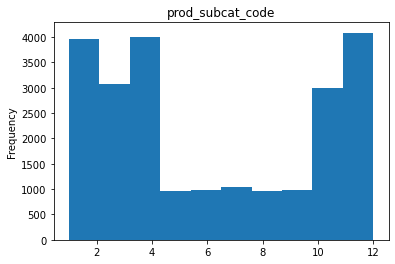

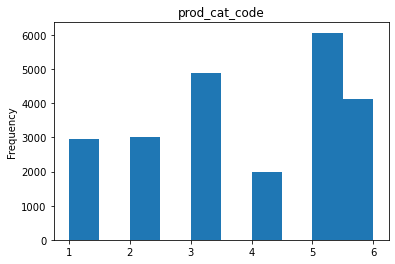

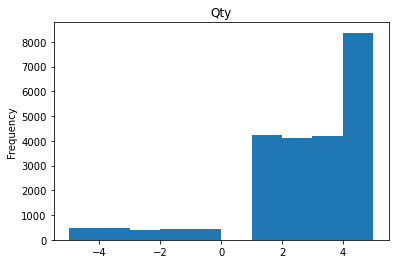

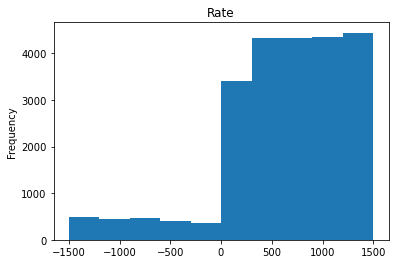

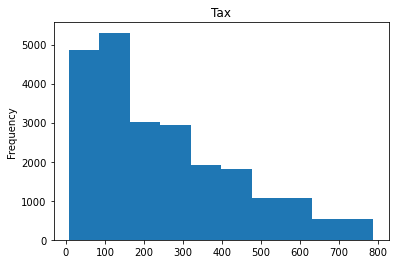

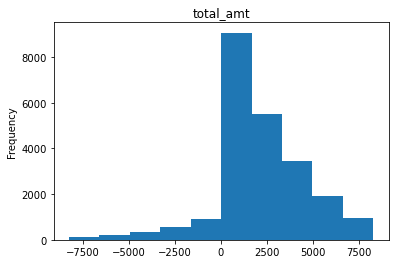

In [31]:
for i in cont_var.columns:
    cont_var[i].plot(kind='hist')
    plt.title(i)
    plt.show()

In [32]:
cat_var = customer_final.loc[:,customer_final.dtypes=='object']

In [33]:
cat_var.columns

Index(['Gender', 'Store_type', 'prod_cat', 'prod_subcat'], dtype='object')

C:\Users\Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Gender', ylabel='count'>

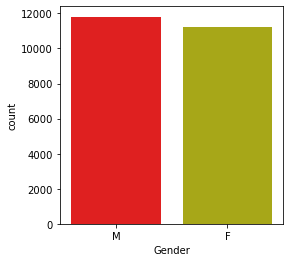

In [34]:
plt.figure(figsize=(4,4))
sns.countplot(cat_var.Gender, palette=['r','y'])

C:\Users\Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Store_type', ylabel='count'>

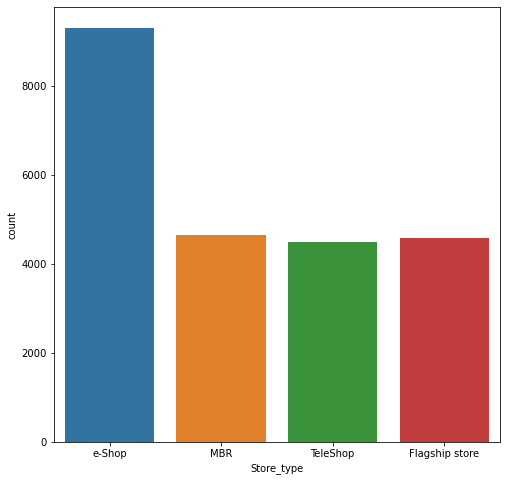

In [35]:
plt.figure(figsize=(8,8))
sns.countplot(cat_var.Store_type)

C:\Users\Girish\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='prod_cat', ylabel='count'>

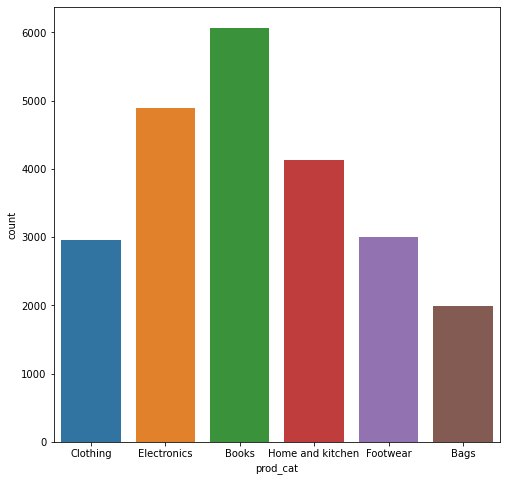

In [36]:
plt.figure(figsize=(8,8))
sns.countplot(cat_var.prod_cat)

<AxesSubplot:ylabel='prod_subcat'>

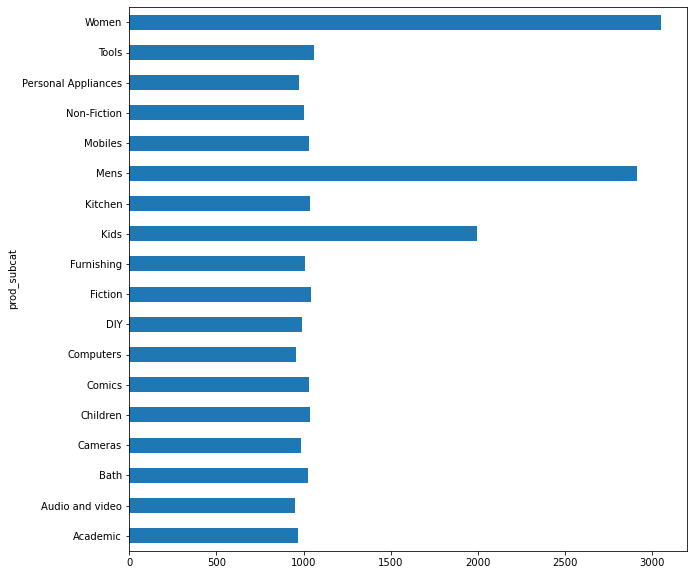

In [37]:
plt.figure(figsize=(10,10))
cat_var.groupby('prod_subcat')['prod_subcat'].count().plot(kind='barh')

4. Calculate the following information using the merged dataset :
    
 a. Time period of the available transaction data




In [38]:
customer_final.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,268867,1987-10-24,F,4.0,73713102191,2014-02-15,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,271944,1971-11-12,F,5.0,79536458466,2014-12-02,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women


In [39]:
customer_final.sort_values(by='tran_date')

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
9067,273949,1974-01-25,M,4.0,45127479223,2011-01-02,3,5,1,366,38.430,404.430,MBR,Books,Comics
12072,266900,1988-10-27,M,9.0,13048732855,2011-01-02,4,4,-1,-1098,115.290,-1213.290,e-Shop,Bags,Women
1953,267124,1974-08-21,M,2.0,80348907828,2011-01-02,5,3,2,552,115.920,1219.920,TeleShop,Electronics,Computers
17991,268624,1986-09-18,F,1.0,36332303449,2011-01-02,10,6,-4,-295,123.900,-1303.900,Flagship store,Home and kitchen,Kitchen
20030,274459,1990-02-13,M,4.0,65685613041,2011-01-02,4,3,-3,-968,304.920,-3208.920,TeleShop,Electronics,Mobiles
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19015,270810,1972-01-03,F,1.0,55245382907,2014-12-02,4,3,2,979,205.590,2163.590,TeleShop,Electronics,Mobiles
13026,270009,1979-04-25,M,3.0,65228973233,2014-12-02,11,5,2,301,63.210,665.210,e-Shop,Books,Children
3983,271180,1987-08-11,M,4.0,74023090711,2014-12-02,8,3,3,271,85.365,898.365,Flagship store,Electronics,Personal Appliances
7004,266794,1971-02-28,F,9.0,15403541663,2014-12-02,3,2,2,322,67.620,711.620,e-Shop,Footwear,Women


In [40]:
min = customer_final['tran_date'].min()
min

Timestamp('2011-01-02 00:00:00')

In [41]:
max = customer_final['tran_date'].max()
max

Timestamp('2014-12-02 00:00:00')

In [42]:
import datetime as dt

In [43]:
a = dt.datetime.strftime(min, format='%d-%m-%Y')
a

'02-01-2011'

In [44]:
b = dt.datetime.strftime(max, format='%d-%m-%Y')
b

'02-12-2014'

In [45]:
print(f'Time period of the available Transaction data is from : {a} to {b}')

Time period of the available Transaction data is from : 02-01-2011 to 02-12-2014


 b. Count of transactions where the total amount of transaction was negative

In [46]:
customer_final[customer_final['total_amt']<0].transaction_id.count()

2177

5. Analyze which product categories are more popular among females vs male customers.

In [47]:
customer_final.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,268867,1987-10-24,F,4.0,73713102191,2014-02-15,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,271944,1971-11-12,F,5.0,79536458466,2014-12-02,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women


In [48]:
product_gender = customer_final.groupby(by=['Gender','prod_cat'])[['Qty']].sum()
product_gender.reset_index()

,Gender,prod_cat,Qty
0,F,Bags,2362
1,F,Books,7070
2,F,Clothing,3425
3,F,Electronics,5832
4,F,Footwear,3716
5,F,Home and kitchen,4895
6,M,Bags,2346
7,M,Books,7587
8,M,Clothing,3748
9,M,Electronics,6476


In [49]:
product_gender.pivot_table(index='Gender',columns='prod_cat', values='Qty')

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2362,7070,3425,5832,3716,4895
M,2346,7587,3748,6476,3555,5041


Books, Clothing, Electronics are popular among Males

Bags, Footwear are popular among Females




6. Which City code has the maximum customers and what was the percentage of customers from 
that city?

In [50]:
customer_final.head(5)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,268867,1987-10-24,F,4.0,73713102191,2014-02-15,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,271944,1971-11-12,F,5.0,79536458466,2014-12-02,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women


In [51]:
a = customer_final.groupby('city_code')[['cust_id']].count()
b = a.sort_values('cust_id', ascending=False).reset_index()
b

,city_code,cust_id
0,4.0,2422
1,3.0,2411
2,5.0,2360
3,7.0,2356
4,10.0,2333
5,8.0,2330
6,2.0,2270
7,1.0,2258
8,9.0,2178
9,6.0,2127


city code 4.0 has the maximum number of customers

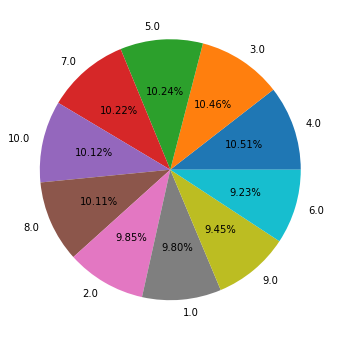

In [52]:
plt.figure(figsize=(6,6))
plt.pie(b['cust_id'],labels=b.city_code,autopct='%1.2f%%')
plt.show()

Therefore Percentage of customers from city code 4.0 is 10.51

7. Which store type sells the maximum products by value and by quantity?

In [53]:
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women


In [54]:
customer_final.groupby('Store_type')[['Qty', 'Rate']].sum().sort_values(by='Qty', ascending=False)

,Qty,Rate
Store_type,,
e-Shop,22763,5941001
MBR,11194,2953253
Flagship store,11133,2941557
TeleShop,10984,2834420


Store_type 'e-shop' sells the maximum products by value and by quantity

8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores?

In [55]:
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women


In [56]:
store_grp = customer_final.pivot_table(index='prod_cat', columns='Store_type', values='total_amt', aggfunc='sum')
store_grp

Store_type,Flagship store,MBR,TeleShop,e-Shop
prod_cat,,,,
Bags,870548.835,848678.675,789181.055,1616300.075
Books,2488205.850,2496039.195,2545005.060,5293443.935
Clothing,1194423.230,1287686.335,1241834.360,2527193.565
Electronics,2215136.040,2107514.565,1973338.835,4426474.195
Footwear,1234806.560,1112163.715,1235719.290,2637084.710
Home and kitchen,1712567.675,1822403.570,1579702.475,3324319.570


In [57]:
store_grp.loc[['Electronics','Clothing'],'Flagship store']

prod_cat
Electronics    2215136.04
Clothing       1194423.23
Name: Flagship store, dtype: float64

9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [58]:
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women


In [59]:
Gen_amt = customer_final.pivot_table(index='Gender', columns='prod_cat', values='total_amt', aggfunc='sum')
Gen_amt

prod_cat,Bags,Books,Clothing,Electronics,Footwear,Home and kitchen
Gender,,,,,,
F,2077985.65,6164692.235,3026750.805,5019354.210,3202552.99,4132177.335
M,2046722.99,6645972.775,3224079.495,5703109.425,3014672.05,4301075.480


In [60]:
Gen_amt.loc['M', 'Electronics']

5703109.425

The Total amount earned from Male customers under the Electronics Category is 5703109.425

10. How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?

In [61]:
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women


In [62]:
positive_trans = customer_final.loc[customer_final['total_amt']>0,:]

In [63]:
positive_trans.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women
2,268867,1987-10-24,F,4.0,73713102191,2014-02-15,1,1,1,714,74.970,788.970,MBR,Clothing,Women
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women
4,271944,1971-11-12,F,5.0,79536458466,2014-12-02,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women
6,274917,1983-05-22,F,6.0,54730601969,2014-07-02,1,1,5,102,53.550,563.550,e-Shop,Clothing,Women


In [64]:
unique_trans = positive_trans.groupby(['cust_id','prod_cat','prod_subcat'])[['transaction_id']].count().reset_index()
unique_trans

,cust_id,prod_cat,prod_subcat,transaction_id
0,266783,Books,Non-Fiction,1
1,266783,Clothing,Mens,2
2,266783,Footwear,Mens,1
3,266784,Books,Fiction,1
4,266784,Books,Non-Fiction,1
...,...,...,...,...
19273,275264,Books,Non-Fiction,1
19274,275264,Home and kitchen,Tools,1
19275,275265,Bags,Mens,1
19276,275265,Books,Academic,1


In [65]:
unique_trans_count = unique_trans.groupby('cust_id')['transaction_id'].count().reset_index()
unique_trans_count

,cust_id,transaction_id
0,266783,3
1,266784,3
2,266785,5
3,266788,4
4,266794,8
...,...,...
5501,275257,4
5502,275261,3
5503,275262,2
5504,275264,2


In [66]:
unique_trans_count[unique_trans_count['transaction_id']>10].sum()

cust_id           0.0
transaction_id    0.0
dtype: float64

There are not more than 10 unique transaction made by any customer

11. For all customers aged between 25 - 35, find out:

 a. What was the total amount spent for “Electronics” and “Books” product categories?
 


In [67]:
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women


In [68]:
customer_final['Year2']=pd.DatetimeIndex(customer_final['DOB']).year
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Year2
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,1981
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women,1981


In [69]:
customer_final['Age']=(dt.datetime.now().year)-(customer_final.Year2)
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Year2,Age
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,1981,41
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women,1981,41


In [70]:
customer_final.drop(columns=['Year2'], axis=1, inplace=True)

In [71]:
customer_final.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.3,-4265.3,e-Shop,Clothing,Women,41
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.3,4265.3,e-Shop,Clothing,Women,41


In [72]:
def age_range(x):
    if x<25:
        return '0-25'
    elif x<35:
        return '26-35'
    else:
        return '35+'

In [73]:
customer_final['agerange']=customer_final.Age.apply(age_range)

In [74]:
customer_final.head()

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,agerange
0,270351,1981-09-26,M,5.0,80712190438,2014-02-28,1,1,-5,-772,405.300,-4265.300,e-Shop,Clothing,Women,41,35+
1,270351,1981-09-26,M,5.0,80712190438,2014-02-20,1,1,5,772,405.300,4265.300,e-Shop,Clothing,Women,41,35+
2,268867,1987-10-24,F,4.0,73713102191,2014-02-15,1,1,1,714,74.970,788.970,MBR,Clothing,Women,35,35+
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,30,26-35
4,271944,1971-11-12,F,5.0,79536458466,2014-12-02,1,1,2,996,209.160,2201.160,e-Shop,Clothing,Women,51,35+


In [75]:
customer_final1 = customer_final[customer_final['agerange']=='26-35']

In [76]:
customer_final1

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,agerange
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,30,26-35
5,267243,1990-03-19,F,6.0,65582112405,2014-08-02,1,1,-3,-1259,396.585,-4173.585,e-Shop,Clothing,Women,32,26-35
7,267794,1990-07-02,F,1.0,51473331806,2014-05-02,1,1,3,292,91.980,967.980,TeleShop,Clothing,Women,32,26-35
8,267489,1990-06-21,F,7.0,92456150942,2014-05-02,1,1,-4,-587,246.540,-2594.540,TeleShop,Clothing,Women,32,26-35
9,267489,1990-06-21,F,7.0,92456150942,2014-03-02,1,1,4,587,246.540,2594.540,TeleShop,Clothing,Women,32,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23027,270708,1989-06-09,F,4.0,90239117803,2011-02-22,1,4,-4,-665,279.300,-2939.300,e-Shop,Bags,Mens,33,26-35
23031,270708,1989-06-09,F,4.0,90239117803,2011-02-20,1,4,4,665,279.300,2939.300,e-Shop,Bags,Mens,33,26-35
23045,273464,1989-06-20,M,4.0,69918810427,2011-04-02,1,4,1,1349,141.645,1490.645,e-Shop,Bags,Mens,33,26-35
23047,268928,1990-05-22,M,8.0,7968305015,2011-02-02,1,4,1,346,36.330,382.330,Flagship store,Bags,Mens,32,26-35


In [77]:
customer_final1.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,agerange
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,30,26-35
5,267243,1990-03-19,F,6.0,65582112405,2014-08-02,1,1,-3,-1259,396.585,-4173.585,e-Shop,Clothing,Women,32,26-35


In [78]:
customer_final1.prod_cat.unique()

array(['Clothing', 'Electronics', 'Books', 'Home and kitchen', 'Footwear',
       'Bags'], dtype=object)

In [79]:
spentby_25_35 = customer_final1.groupby(['prod_cat'])[['total_amt']].sum()

In [80]:
spentby_25_35

,total_amt
prod_cat,
Bags,873679.300
Books,2667784.925
Clothing,1443346.580
Electronics,2272147.410
Footwear,1433147.430
Home and kitchen,1864549.375


In [81]:
spentby_25_35.loc[['Books','Electronics'],:]

,total_amt
prod_cat,
Books,2667784.925
Electronics,2272147.410


In [82]:
total_spent = spentby_25_35.loc[['Books','Electronics'],:].sum()
total_spent

total_amt    4939932.335
dtype: float64

Total amount spent on Electronics and Books product categories is 4939932.335

 b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [83]:
customer_final1.head(2)

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,agerange
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,30,26-35
5,267243,1990-03-19,F,6.0,65582112405,2014-08-02,1,1,-3,-1259,396.585,-4173.585,e-Shop,Clothing,Women,32,26-35


In [84]:
total_amount = customer_final1[(customer_final1['tran_date']>='2014-01-01')&(customer_final1['tran_date']<='2014-03-01')]

In [85]:
total_amount

,cust_id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat,Age,agerange
3,270625,1992-03-02,M,6.0,57134739558,2014-02-14,1,1,5,595,312.375,3287.375,TeleShop,Clothing,Women,30,26-35
13,270949,1990-09-12,M,9.0,22826695874,2014-01-31,1,1,4,1481,622.020,6546.020,e-Shop,Clothing,Women,32,26-35
14,267243,1990-03-19,F,6.0,65582112405,2014-01-29,1,1,3,1259,396.585,4173.585,e-Shop,Clothing,Women,32,26-35
16,270240,1988-07-12,M,1.0,64939234724,2014-01-29,1,1,4,644,270.480,2846.480,e-Shop,Clothing,Women,34,26-35
21,266853,1990-09-18,M,6.0,42789741259,2014-01-26,1,1,2,1152,241.920,2545.920,MBR,Clothing,Women,32,26-35
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22070,272142,1988-10-13,M,8.0,61033643931,2014-01-23,1,4,1,1134,119.070,1253.070,e-Shop,Bags,Mens,34,26-35
22076,272326,1991-04-09,F,8.0,3234902312,2014-01-17,1,4,1,1312,137.760,1449.760,e-Shop,Bags,Mens,31,26-35
22077,270716,1988-08-09,F,6.0,7674719485,2014-01-17,1,4,5,1406,738.150,7768.150,TeleShop,Bags,Mens,34,26-35
22080,274661,1988-07-21,F,10.0,26590265799,2014-01-14,1,4,3,861,271.215,2854.215,Flagship store,Bags,Mens,34,26-35


In [86]:
total_amount['total_amt'].sum()

377575.18499999994

In [87]:
print('The total amount spent by customer aged 25-35 between 1st jan 2014 to 1st mar 2014 is', total_amount['total_amt'].sum().round(2))

The total amount spent by customer aged 25-35 between 1st jan 2014 to 1st mar 2014 is 377575.18
